In [18]:
import pandas as pd
df_ce = pd.read_csv('C:/coding/multicampus/5조_세미프로젝트/KDTteam5_semiproject/datas_background/한국은행 경제통계 시스템/가계의 목적별 최종소비지출(계절조정, 명목, 분기)_02124923.csv'
                     , header=None, skipfooter=4, thousands=',', encoding='utf8')
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13 non-null     object
 1   1       13 non-null     object
 2   2       13 non-null     object
 3   3       13 non-null     object
 4   4       13 non-null     object
 5   5       13 non-null     object
 6   6       13 non-null     object
 7   7       13 non-null     object
 8   8       13 non-null     object
 9   9       13 non-null     object
 10  10      13 non-null     object
 11  11      13 non-null     object
 12  12      13 non-null     object
 13  13      13 non-null     object
 14  14      13 non-null     object
 15  15      13 non-null     object
 16  16      13 non-null     object
 17  17      13 non-null     object
 18  18      13 non-null     object
 19  19      13 non-null     object
 20  20      13 non-null     object
 21  21      13 non-null     object
 22  22      13 non-null     obje

C:\Users\user\AppData\Local\Temp\ipykernel_10636\606012559.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_ce = pd.read_csv('C:/coding/multicampus/5조_세미프로젝트/KDTteam5_semiproject/datas_background/한국은행 경제통계 시스템\가계의 목적별 최종소비지출(계절조정, 명목, 분기)_02124923.csv'


In [19]:
#필요한 분기 년도: 2019.3분기 ~ 2022년1분기
#2019.3분기 컬럼 위치 확인
df_ce.values[0][17]

'2019/Q3'

In [20]:
#불필요한 컬럼 삭제
ce_drop = [x for x in range(2,17)] + [0, 28]
df_ce = df_ce.drop(ce_drop, axis=1) 
df_ce = df_ce.drop([1])
df_ce.head(3)

,1,17,18,19,20,21,22,23,24,25,26,27
0,계정항목,2019/Q3,2019/Q4,2020/Q1,2020/Q2,2020/Q3,2020/Q4,2021/Q1,2021/Q2,2021/Q3,2021/Q4,2022/Q1
2,식료품 및 비주류음료품,24974,25812.9,26877.1,27011.3,28064.9,28420.7,28721.3,29056.4,29608.4,30196.3,29733
3,주류 및 담배,4027.1,4081.1,4152.1,4166.7,4256.9,4060.6,4183.6,4302.8,4248.1,4197.9,4353


In [21]:
#인덱스 재설정
df_ce = df_ce.rename(columns=df_ce.iloc[0])
df_ce = df_ce.set_index(keys='계정항목')
df_ce.drop('계정항목', inplace=True)

In [22]:
#value 값을 실수로 변경
df_ce = df_ce.astype('float64')
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries,   식료품 및 비주류음료품 to   음식점 및 숙박 서비스
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2019/Q3  11 non-null     float64
 1   2019/Q4  11 non-null     float64
 2   2020/Q1  11 non-null     float64
 3   2020/Q2  11 non-null     float64
 4   2020/Q3  11 non-null     float64
 5   2020/Q4  11 non-null     float64
 6   2021/Q1  11 non-null     float64
 7   2021/Q2  11 non-null     float64
 8   2021/Q3  11 non-null     float64
 9   2021/Q4  11 non-null     float64
 10  2022/Q1  11 non-null     float64
dtypes: float64(11)
memory usage: 1.0+ KB


In [23]:
df_ce.head()

,2019/Q3,2019/Q4,2020/Q1,2020/Q2,2020/Q3,2020/Q4,2021/Q1,2021/Q2,2021/Q3,2021/Q4,2022/Q1
계정항목,,,,,,,,,,,
식료품 및 비주류음료품,24974.0,25812.9,26877.1,27011.3,28064.9,28420.7,28721.3,29056.4,29608.4,30196.3,29733.0
주류 및 담배,4027.1,4081.1,4152.1,4166.7,4256.9,4060.6,4183.6,4302.8,4248.1,4197.9,4353.0
의류 및 신발,13280.6,12933.6,10494.5,11541.2,10933.0,11319.0,11348.8,12619.9,12670.9,13417.4,12577.9
임대료 및 수도광열,38809.9,39059.3,39130.8,39857.0,39688.6,39937.6,40187.1,40636.4,40983.1,41455.6,42265.2
가계시설 및 운영,6522.0,6675.6,6907.0,7323.5,7620.6,7872.2,7876.6,7773.3,8036.8,8391.2,8009.2


In [24]:
# 변동률 계산
import rate_of_change as rc
data = pd.DataFrame()
for column in range(len(df_ce.columns)-1):
    col = rc.rate_of_change(df_ce.iloc[:, column], df_ce.iloc[:, column+1])
    data[column] = pd.concat([col], axis=1)
data

,0,1,2,3,4,5,6,7,8,9
계정항목,,,,,,,,,,
식료품 및 비주류음료품,3.36,4.12,0.50,3.90,1.27,1.06,1.17,1.90,1.99,-1.53
주류 및 담배,1.34,1.74,0.35,2.16,-4.61,3.03,2.85,-1.27,-1.18,3.69
의류 및 신발,-2.61,-18.86,9.97,-5.27,3.53,0.26,11.20,0.40,5.89,-6.26
임대료 및 수도광열,0.64,0.18,1.86,-0.42,0.63,0.62,1.12,0.85,1.15,1.95
가계시설 및 운영,2.36,3.47,6.03,4.06,3.30,0.06,-1.31,3.39,4.41,-4.55
의료보건,2.08,-3.84,3.19,0.69,-0.78,2.56,4.82,1.55,1.79,6.52
교통,3.11,-8.58,7.28,-0.25,-0.80,2.42,2.70,-2.62,1.50,1.58
정보 통신,2.51,-0.00,4.28,2.16,0.16,1.11,-1.56,2.68,2.28,-1.08
"오락, 스포츠 및 문화",1.86,-14.14,-10.06,2.07,1.89,-2.28,11.16,1.37,8.33,-4.06


In [33]:
#columns header 리스트 생성
data_col = [ f'{year}/Q{quarter} 대비 {year}/Q{quarter+1} 변동률' 
            if quarter+1 != 5 else f'{year}/Q{quarter} 대비 {year+1}/Q1 변동률' 
            for year in range(2019, 2023) 
            for quarter in range(1,5) ]
data_col[2:12]

['2019/Q3 대비 2019/Q4 변동률',
 '2019/Q4 대비 2020/Q1 변동률',
 '2020/Q1 대비 2020/Q2 변동률',
 '2020/Q2 대비 2020/Q3 변동률',
 '2020/Q3 대비 2020/Q4 변동률',
 '2020/Q4 대비 2021/Q1 변동률',
 '2021/Q1 대비 2021/Q2 변동률',
 '2021/Q2 대비 2021/Q3 변동률',
 '2021/Q3 대비 2021/Q4 변동률',
 '2021/Q4 대비 2022/Q1 변동률']

In [34]:
#변동률로 columns header 설정
data.loc[12] = data_col[2:12]
data = data.rename(columns=data.iloc[11])
data = data.drop(data.index[11])
data.columns.name = '변동률'
data

변동률,2019/Q3 대비 2019/Q4 변동률,2019/Q4 대비 2020/Q1 변동률,2020/Q1 대비 2020/Q2 변동률,2020/Q2 대비 2020/Q3 변동률,2020/Q3 대비 2020/Q4 변동률,2020/Q4 대비 2021/Q1 변동률,2021/Q1 대비 2021/Q2 변동률,2021/Q2 대비 2021/Q3 변동률,2021/Q3 대비 2021/Q4 변동률,2021/Q4 대비 2022/Q1 변동률
계정항목,,,,,,,,,,
식료품 및 비주류음료품,3.36,4.12,0.5,3.9,1.27,1.06,1.17,1.9,1.99,-1.53
주류 및 담배,1.34,1.74,0.35,2.16,-4.61,3.03,2.85,-1.27,-1.18,3.69
의류 및 신발,-2.61,-18.86,9.97,-5.27,3.53,0.26,11.2,0.4,5.89,-6.26
임대료 및 수도광열,0.64,0.18,1.86,-0.42,0.63,0.62,1.12,0.85,1.15,1.95
가계시설 및 운영,2.36,3.47,6.03,4.06,3.3,0.06,-1.31,3.39,4.41,-4.55
의료보건,2.08,-3.84,3.19,0.69,-0.78,2.56,4.82,1.55,1.79,6.52
교통,3.11,-8.58,7.28,-0.25,-0.8,2.42,2.7,-2.62,1.5,1.58
정보 통신,2.51,-0.0,4.28,2.16,0.16,1.11,-1.56,2.68,2.28,-1.08
"오락, 스포츠 및 문화",1.86,-14.14,-10.06,2.07,1.89,-2.28,11.16,1.37,8.33,-4.06


In [35]:
# value 타입 변경
data = data.astype(dtype='float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries,   식료품 및 비주류음료품 to   음식점 및 숙박 서비스
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   2019/Q3 대비 2019/Q4 변동률  11 non-null     float64
 1   2019/Q4 대비 2020/Q1 변동률  11 non-null     float64
 2   2020/Q1 대비 2020/Q2 변동률  11 non-null     float64
 3   2020/Q2 대비 2020/Q3 변동률  11 non-null     float64
 4   2020/Q3 대비 2020/Q4 변동률  11 non-null     float64
 5   2020/Q4 대비 2021/Q1 변동률  11 non-null     float64
 6   2021/Q1 대비 2021/Q2 변동률  11 non-null     float64
 7   2021/Q2 대비 2021/Q3 변동률  11 non-null     float64
 8   2021/Q3 대비 2021/Q4 변동률  11 non-null     float64
 9   2021/Q4 대비 2022/Q1 변동률  11 non-null     float64
dtypes: float64(10)
memory usage: 968.0+ bytes


c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\

<AxesSubplot:xlabel='변동률', ylabel='계정항목'>

c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from cur

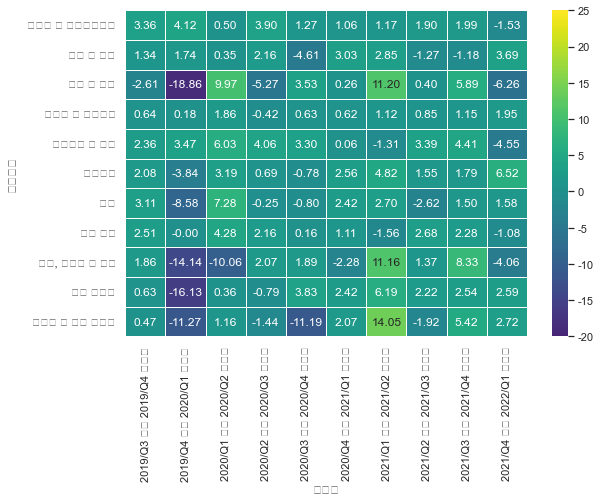

In [38]:
#시각화 > 한글 깨짐 이슈 해결 필요..
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data, vmin= -20,  vmax= 25,cbar=True, center=0,
            annot=True, fmt=".2f", linewidths=.5, cmap='viridis')